<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 6
#### Benjamín Ithurburu

### Introducción: 
En este notebook se diseñará un filtro Pasa Banda Chebyshev a partir de la siguiente plantilla.
<center><img src="./plantilla.png" width="500"/></center>

Para lograr el diseño del filtro Pasa Banda, primero se diseñará el filtro Pasa Bajos adecuado. Luego, se realizará la transformación de Pasa Bajos (LP) a Pasa Banda (BP) para obtener el filtro solicitado.

### Diseño
En el PDF adjuntado a continuación se desarrollan los puntos del **1)** al **5)** del trabajo.

In [33]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 6.pdf", width=1000, height=1000)

### Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
from scipy import signal
from scipy.signal import TransferFunction

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.sistemas_lineales import parametrize_sos, pzmap, GroupDelay, bodePlot, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías


Se realiza la normalización en frecuencia de la platilla y se obtienen los coeficientes $\epsilon$ y $\alpha_{min}$ con el objetivo de obtener el  filtro LP Chebyshev pedido.

In [35]:
# alpha_min = 16 //valor requerido
alpha_max = 0.5
ee_2 = 10**(alpha_max/10)-1
ee = np.sqrt(ee_2)

Q = 5
fs1 = 17e3
f0 = 22e3
w0 = 2*np.pi*f0
ws1 = 2*np.pi*fs1
ws1_n = ws1/w0
Wp_n = 1
Ws_n = np.abs(Q*(ws1_n**2-1)/ws1_n)

# Se itera n hasta que alpha sea mayor a alpha_min
n=3
alpha_min = 10*np.log10(1+ee_2*np.cosh(n*np.arccosh(Ws_n))**2)

Se procede a obtener los polos de la función transferencia LP y sus respectivos coeficientes $\alpha$ y $\beta$ 

In [36]:
# Se obtienen las raices del denominador de |T(s)|**2
roots = np.roots([ 1 , 0 , 3/2 , 0 , 9/16 , 0 , -1/(16*ee_2) ])

print("Raices del denominador de |T(s)|**2:\n", roots)

# Se obtienen los coeficientes de las transferencias a partir de las raices
# T1(s)
alpha1 = np.absolute(np.real(roots[4]))

print("Coeficientes para armar la T1(s):")
print("# alpha1=", alpha1)


# T2(s)
alpha2 = np.absolute(np.real(roots[0]))
beta2 = np.imag(roots[0])
2*alpha2 
alpha2**2 + beta2**2

print("Coeficientes para armar la T2(s):")
print("# alpha2=", alpha2)
print("# beta2=", beta2)
print("# 2*alpha2=", 2*alpha2) 
print("# alpha2**2 + beta2**2=", alpha2**2 + beta2**2)


Raices del denominador de |T(s)|**2:
 [-0.31322824+1.02192749j -0.31322824-1.02192749j  0.31322824+1.02192749j
  0.31322824-1.02192749j -0.62645649+0.j          0.62645649+0.j        ]
Coeficientes para armar la T1(s):
# alpha1= 0.6264564863402746
Coeficientes para armar la T2(s):
# alpha2= 0.31322824317013775
# beta2= 1.0219274910473608
# 2*alpha2= 0.6264564863402755
# alpha2**2 + beta2**2= 1.1424477292778048


Por medio de cálculo simbólico se obtiene la función transferencia LP de orden 1 y orden 2 en función de los coeficientes $\alpha$ y $\beta$. Posteriormente se obtienen la función transferencia LP total producto de cascoderar ambas transferencias.

In [37]:
# Simulación simbólica
## Definición de variables simbólicas
s = sp.symbols('s', complex=True)
a1, a2 = sp.symbols("a1, a2")
b2 = sp.symbols("b2")
epsilon = sp.symbols("e")

## Obtención de transferencia en función de alpha y beta
T1 = sp.sqrt(1/(16*epsilon**2))/(s + a1)
T2 = 1/(s**2 + 2*a2*s + (a2**2 + b2**2))

T = T1*T2

num1, den1 = sp.fraction(sp.simplify(sp.expand(T1)))
num1 = sp.Poly(num1,s)
den1 = sp.Poly(den1,s)
print_subtitle('Transferencia de Pasa Bajos de primer orden en función de alpha y beta')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num1/den1)) )

num2, den2 = sp.fraction(sp.simplify(sp.expand(T2)))
num2 = sp.Poly(num2,s)
den2 = sp.Poly(den2,s)
print_subtitle('Transferencia de Pasa Bajos de segundo orden en función de alpha y beta')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num2/den2)) )

num, den = sp.fraction(sp.simplify(sp.expand(T)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)
print_subtitle('Transferencia total de Pasa Bajos Chebyshev en función de alpha y beta')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num/den)) )

#### Transferencia de Pasa Bajos de primer orden en función de alpha y beta

<IPython.core.display.Math object>

#### Transferencia de Pasa Bajos de segundo orden en función de alpha y beta

<IPython.core.display.Math object>

#### Transferencia total de Pasa Bajos Chebyshev en función de alpha y beta

<IPython.core.display.Math object>

Se aplica el núcleo de transformación LP-BP a las funciones transferencias recientemente obtenidas del Pasa Bajos diseñado. De esta manera se logra obtener la función transferencia del filtro Pasa Bandas Chebyshev en función de $\alpha$, $\beta$, $Q$ y $\epsilon$, resultando este de sexto orden.

In [38]:
p = sp.symbols('p', complex=True)
Q = sp.symbols("Q")
s = Q*(p**2+1)/p

T1 = sp.sqrt(1/(16*epsilon**2))/(s + a1)
T2 = 1/(s**2 + 2*a2*s + (a2**2 + b2**2))

T = T1*T2

num1, den1 = sp.fraction(sp.simplify(sp.expand(T1)))
num1 = sp.Poly(num1,p)
den1 = sp.Poly(den1,p)
print_subtitle('Transferencia Pasa Banda de segundo orden luego de la transformación')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num1/den1)) )

num2, den2 = sp.fraction(sp.simplify(sp.expand(T2)))
num2 = sp.Poly(num2,p)
den2 = sp.Poly(den2,p)
print_subtitle('Transferencia Pasa Banda de cuarto orden luego de la transformación')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num2/den2)) )

num, den = sp.fraction(sp.simplify(sp.expand(T)))
num = sp.Poly(num,p)
den = sp.Poly(den,p)
print_subtitle('Transferencia filto Pasa Banda de sexto orden en función de los coeficientes')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num/den)) )

#### Transferencia Pasa Banda de segundo orden luego de la transformación

<IPython.core.display.Math object>

#### Transferencia Pasa Banda de cuarto orden luego de la transformación

<IPython.core.display.Math object>

#### Transferencia filto Pasa Banda de sexto orden en función de los coeficientes

<IPython.core.display.Math object>

Se realiza el reemplazo de los coeficientes $\alpha$, $\beta$, $Q$ y $\epsilon$, por sus respectivos valores previamente calculados. Obteniendose de esta forma la transferencia del filtro PB particular para esta plantilla.
Seguidamente se separa a la transferencia en funciones Bicuadráticas, con el objetivo de poder llevar a cabo la sintetización en la red tanto pasiva, como activa.

In [39]:
Q = 5
a1 = alpha1
a2 = alpha2
b2 = beta2
epsilon = ee
s = Q*(p**2+1)/p

T1 = sp.sqrt(1/(16*epsilon**2))/(s + a1)
T2 = 1/(s**2 + 2*a2*s + (a2**2 + b2**2))

T = T1*T2

num, den = sp.fraction(sp.simplify(sp.expand(T)))
num1 = sp.Poly(num,p)
den1 = sp.Poly(den,p)
print_subtitle('Transferencia filto Pasa Banda luego de reemplazo de valores')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num1/den1)) )

num11 = np.float64(num1.all_coeffs())
den11 = np.float64(den1.all_coeffs())

mySOS = tf2sos_analog(num11, den11)
print_subtitle('Transferencia filto Pasa Banda Chebyshev expresada en Bicuadráticas')
pretty_print_SOS(mySOS)


#### Transferencia filto Pasa Banda luego de reemplazo de valores

<IPython.core.display.Math object>

#### Transferencia filto Pasa Banda Chebyshev expresada en Bicuadráticas

<IPython.core.display.Math object>

Gráfico de Mágnitud, Frecuencia, Retardo de Grupo y Polos y Ceros de la función transferencia del filtro Pasa Banda Chebyshev de orden 6, diseñado para cumplir con la plantilla indicada.

(30,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

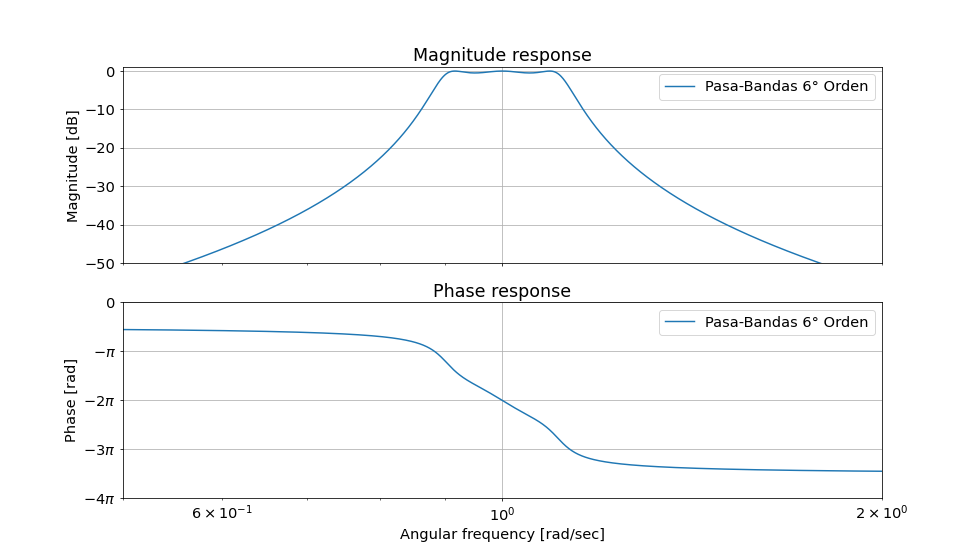

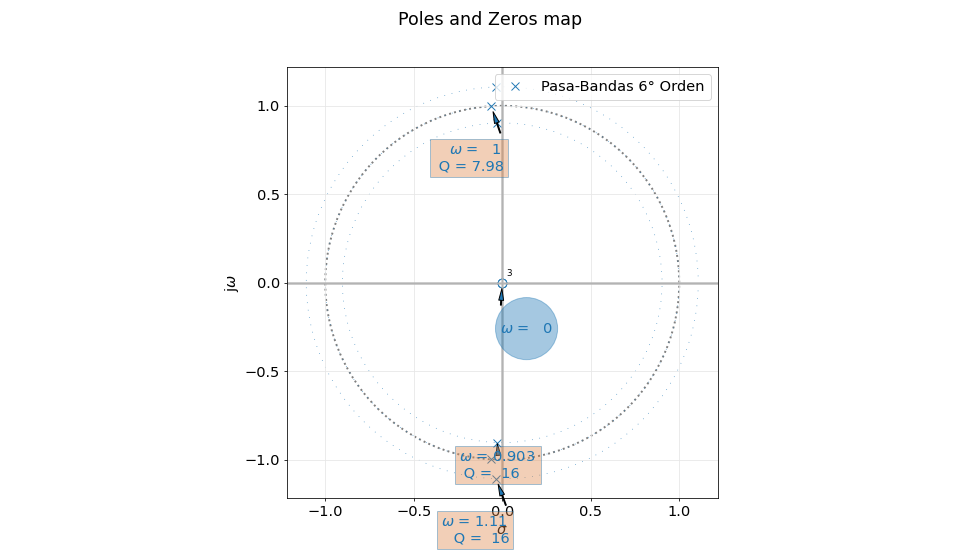

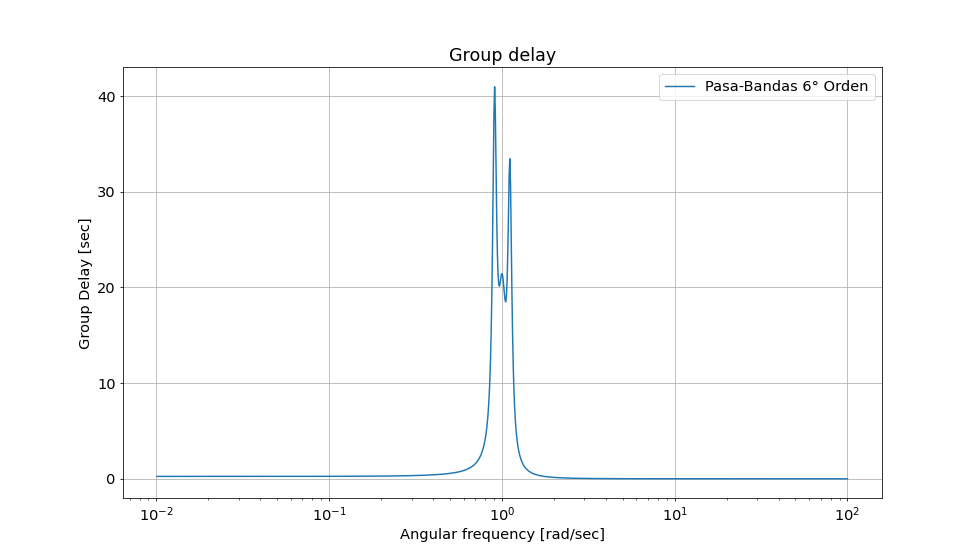

In [18]:
# Obtención de función transferencia
my_tf = TransferFunction(num11,den11)

# Gráfico Bode
fig1, axs = bodePlot(my_tf, filter_description='Pasa-Bandas 6° Orden', npoints=10000)
axs[0].set_xlim(0.5, 2)  # Establecer límites del eje y en la subtrama 0
axs[0].set_ylim(-50, 1)  # Establecer límites del eje y en la subtrama 0

# Gráfico de Polos y Ceros
pzmap(my_tf, True, filter_description='Pasa-Bandas 6° Orden')

# Group Delay
GroupDelay(my_tf, filter_description='Pasa-Bandas 6° Orden')


Obtención de los valores de los parámetros $Q$ y $W_0$ correspondientes a cada una de las funciones Bicuadráticas que componen a la función transferencia total.

In [40]:
# Se obtienen los valores de los parámetros Q y Wo

Wo1 = np.sqrt(mySOS[0,5])
Q1 = Wo1/mySOS[0,4]

Wo2 = np.sqrt(mySOS[1,5])
Q2 = Wo2/mySOS[1,4]

Wo3 = np.sqrt(mySOS[2,5])
Q3 = Wo3/mySOS[2,4]

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("Wo1 = ", Wo1)
print("Wo2 = ", Wo2)
print("Wo3 = ", Wo3)

Q1 =  7.981400319134738
Q2 =  16.046017359125507
Q3 =  16.046017359126566
Wo1 =  0.9999999999999939
Wo2 =  1.10745556372932
Wo3 =  0.9029707671814298


Se procede a calcular de forma simbólica la transferencia de la red mencionada en el punto **5)**, compuesta por un GIC y un levantamiento parcial de masas y un agregado de componentes que lo convierten en un filtro PB de segundo orden.

<center><img src="./circuito_punto5.png" width="700"/></center>

In [41]:
# variables simbólicas
s = sp.symbols('s', complex=True)
Vi, Vo, Vx, Vy = sp.symbols("Vi, Vo, Vx, Vy")
G1, G3, G4, G5, Gb, Gc, C1, C2 = sp.symbols("G1, G3, G4, G5, Gb, Gc, C1, C2")
G, a = sp.symbols("G, a")

Gb = a*G
Gc = (1-a)*G

# Sistemas de ecuaciones del modelo ideal, negativamente realimentado
aa = sp.solve([
                Vx*(Gb+Gc+G1+s*C1) - Vi*Gb - Vy*G1,
                Vx*(G3+s*C2) - Vy*s*C2 - Vo*G3, 
                Vx*(G4+G5) - Vo*G4
                ], 
                [Vi, Vo, Vx, Vy])
T = aa[Vo]/aa[Vi]

num, den = sp.fraction(sp.simplify(sp.expand(T)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)
num1, den1, w_on, Q_n, w_od, Q_d, k = parametrize_sos(num, den)

print_subtitle('Transferencia obtenida de la red con GIC')

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(k,num1/den1, evaluate=False)) ))

print_subtitle('Parámetros')

display(Math( r' k = ' + sp.latex(k) ))

display(Math( r' \omega_0 = ' + sp.latex(w_od) ))

display(Math( r' Q = ' + sp.latex(Q_d) ))

#### Transferencia obtenida de la red con GIC

<IPython.core.display.Math object>

#### Parámetros

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A continuación se anexa la resolución del sistema de ecuaciones, para obtener los parámetro $R$, $R_4$ y $C$

In [42]:
# Resolución de sistema de ecuaciones
k, Wo, Q, a, R, R4, C = sp.symbols("k, Wo, Q, a, R, R4, C")

bb = sp.solve([
                k - a*(R4+1),
                Wo**2 - R4/C**2,
                Q - R*C*Wo
                ],
                [R, R4, C])
    
print("[R, R4, C]= ", bb)


[R, R4, C]=  [(-Q*a*sqrt(-(a - k)/a)/(a - k), (-a + k)/a, sqrt((-a + k)/a)/Wo), (Q*a*sqrt((-a + k)/a)/(a - k), (-a + k)/a, -sqrt(-(a - k)/a)/Wo)]


### Simulación circuital
A continuación, se presenta la simulación en LTspice de la red, en sus versiones pasiva y activa, normalizadas tanto en frecuencia como en impedancia. Esta simulación cumple con los requisitos establecidos en la plantilla normalizada.

##### Esquemático red pasiva
<center><img src="./circuito_simulacion_red_pasiva.png" width="1000"/></center>

##### Respuesta en frecuencia red pasiva. Análisis banda de paso
<center><img src="./bode_simulacion_red_pasiva_paso.png" width="1000"/></center>

$f_{p1n}=\frac{w_{p1n}}{2\pi}=\frac{0.905}{2\pi}\approx0.14403$ ; $f_{p2n}=\frac{w_{p2n}}{2\pi}=\frac{1.105}{2\pi}\approx0.17587$ ; $B_f=\frac{B_w}{2\pi}=\frac{0.2}{2\pi}\approx0.031831$

##### Respuesta en frecuencia red pasiva. Análisis banda de stop
<center><img src="./bode_simulacion_red_pasiva_stop.png" width="1000"/></center>

$f_{s1n}=\frac{w_{s1n}}{2\pi}=\frac{0.773}{2\pi}\approx0.12303$ ; $f_{s2n}=\frac{w_{s2n}}{2\pi}=\frac{1.636}{2\pi}\approx0.26038$

##### Esquemático red activa
En esta red se optó por variar los coeficientes $a_i$ de los levantamientos parciales de masas, con el objetivo de lograr una transferencia más fiel a la plantilla indicada. Intentando lograr además, un Chebyshev más simétrico en la banda de paso, como el simulado en Python.
<center><img src="./circuito_simulacion_red_activa.png" width="1000"/></center>

##### Respuesta en frecuencia red pasiva. Análisis banda de paso
<center><img src="./bode_simulacion_red_activa_paso.png" width="1000"/></center>

$f_{p1n}=\frac{w_{p1n}}{2\pi}=\frac{0.905}{2\pi}\approx0.14403$ ; $f_{p2n}=\frac{w_{p2n}}{2\pi}=\frac{1.105}{2\pi}\approx0.17587$ ; $B_f=\frac{B_w}{2\pi}=\frac{0.2}{2\pi}\approx0.031831$

##### Respuesta en frecuencia red pasiva. Análisis banda de stop
<center><img src="./bode_simulacion_red_activa_stop.png" width="1000"/></center>

$f_{s1n}=\frac{w_{s1n}}{2\pi}=\frac{0.773}{2\pi}\approx0.12303$ ; $f_{s2n}=\frac{w_{s2n}}{2\pi}=\frac{1.636}{2\pi}\approx0.26038$

### Conclusión
En este trabajo, se ha diseñado y simulado un filtro Pasa Banda Chebyshev de sexto orden a partir de la transformación de un filtro Pasa Bajos.

El proceso comenzó con el diseño del filtro Pasa Bajos (LP), obteniendo los coeficientes necesarios y calculando los polos de la función de transferencia. Luego, se aplicó la transformación LP a BP, logrando así la función de transferencia del filtro Pasa Banda Chebyshev.

Se verificó la transferencia obtenida, descomponiéndola en funciones Bicuadráticas para facilitar la síntesis de las redes pasivas y activas. Los parámetros 𝑄 y 𝑊𝑜 correspondientes a cada función Bicuadrática fueron determinados.

Finalmente, se realizaron simulaciones en LTspice para ambas versiones del filtro, normalizadas en frecuencia e impedancia, cumpliendo con los requisitos establecidos. La variación de los coeficientes en los levantamientos parciales de masas permitió obtener una transferencia más fiel a la plantilla indicada.

Los puntos analizados en la simulación circuital corresponden a los pedidos en la plantilla, salvo por algunos mdB de desfase de la red activa en la banda de paso, lo cual no se consideró significativo. El ancho de banda también fue correctamente obtenido.

En resumen, el diseño y la simulación del filtro Pasa Banda Chebyshev de sexto orden fueron exitosos, cumpliendo con los requisitos de la plantilla y demostrando la efectividad del enfoque utilizado.